# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\1\AppData\Local\Temp\ipykernel_23960\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


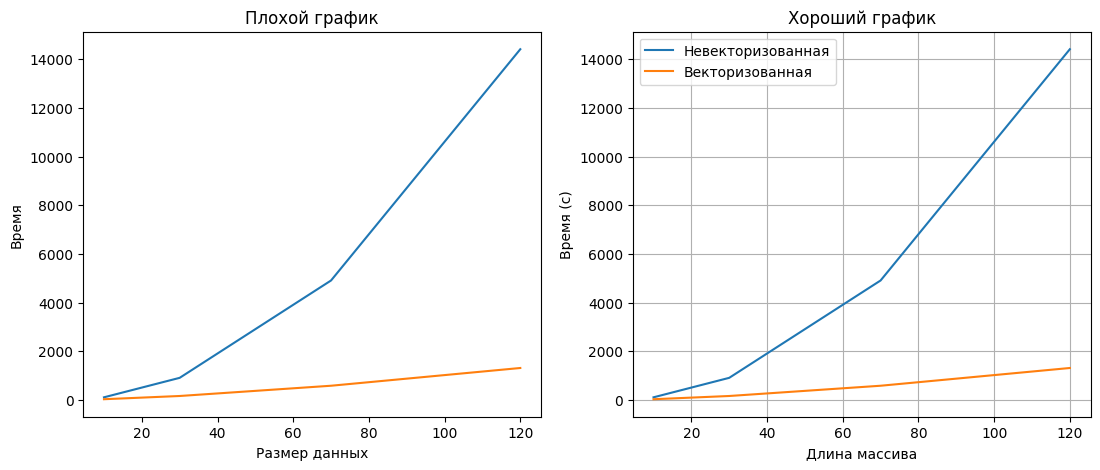

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

3
8.08 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.98 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.24 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.8 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.1 µs ± 92.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
30.7 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.39 µs ± 42 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
43.1 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.62 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
55.2 µs ± 566 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.59 µs ± 43.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
68 µs ± 670 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.62 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
81.2 µs ± 2.03 µs per loop (m

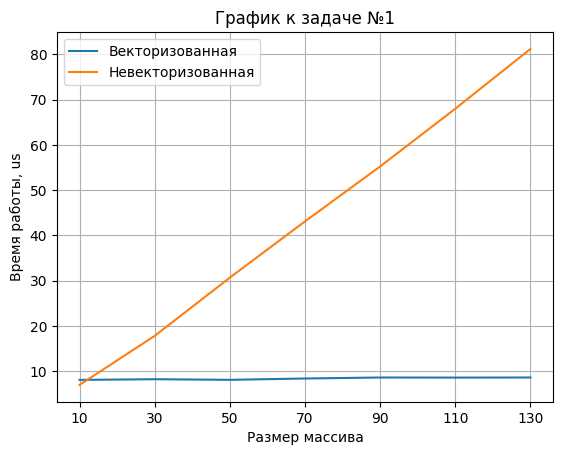

In [16]:
def prod_non_zero_diag(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Not vectorized implementation.
    """
    p = 1
    for i in range(len(x)):
        if i < len(x[i]):
            if x[i][i] != 0:
                p *= x[i][i]
    return p

def prod_non_zero_diag_v(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Vectorized implementation.
    """
    return np.prod(np.diag(x)[np.diag(x)!=0])

x = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
print(prod_non_zero_diag_v(x))

data_size_1 = [x for x in range(10, 150, 20)]
v_list_1 = []
non_v_list_1 = []
for size in data_size_1:
    X = np.random.randint(-2, 2, (size, size))
    v_time = %timeit -o prod_non_zero_diag_v(X)
    non_v_time = %timeit -o prod_non_zero_diag(X)
    v_list_1.append(v_time.average * 1000000)
    non_v_list_1.append(non_v_time.average * 1000000)

plt.plot(data_size_1, v_list_1, label=u"Векторизованная")
plt.plot(data_size_1, non_v_list_1, label=u"Невекторизованная")
plt.xticks(data_size_1)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №1')
plt.grid(True)
plt.legend()

plt.show()


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


True
True
135 µs ± 756 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
13.4 µs ± 54.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
298 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
23.9 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
450 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
35.7 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
576 µs ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
46.2 µs ± 302 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
727 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
56.4 µs ± 735 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
848 µs ± 8.26 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
71 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
962 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
81.8 µs ± 948 ns per loop (mean ± s

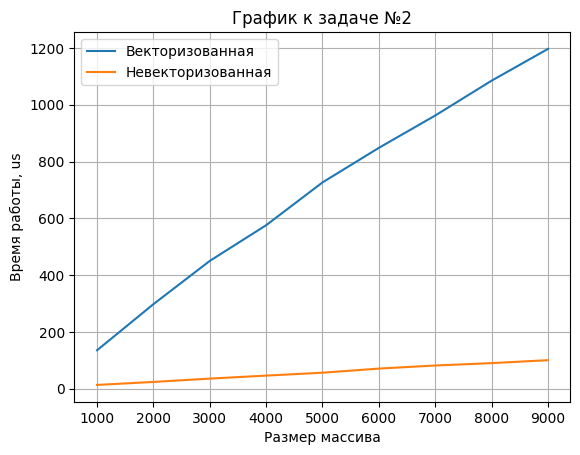

In [ ]:
def are_multisets_equal(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """
    x.sort()
    y.sort()
    if np.all(x == y):
        return True
    return False
    
def are_multisets_equal_v(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Vectorized implementation.
    """
    if(np.shape(np.unique(x, return_counts=True)[0]) != np.shape(np.unique(y, return_counts=True)[0])):
        return False
    if(np.any(np.unique(x, return_counts=True)[0] != np.unique(y, return_counts=True)[0]) or np.any(np.unique(x, return_counts=True)[1] != np.unique(y, return_counts=True)[1])):
        return False
    return True

x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
a = [1, 2, 2, 4]
b = [4, 2, 1, 2]
print(are_multisets_equal(a, b))
print(are_multisets_equal_v(x, y))

data_size_2 = [x for x in range(1000, 10000, 1000)]
v_list_2 = []
non_v_list_2 = []
for size in data_size_2:
    X = np.random.randint(-10, 10, (size))
    Y = np.random.randint(-10, 10, (size))
    v_time = %timeit -o are_multisets_equal_v(X, Y)
    non_v_time = %timeit -o are_multisets_equal(X, Y)
    v_list_2.append(v_time.average * 1000000)
    non_v_list_2.append(non_v_time.average * 1000000)

plt.plot(data_size_2, v_list_2, label=u"Векторизованная")
plt.plot(data_size_2, non_v_list_2, label=u"Невекторизованная")
plt.xticks(data_size_2)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №2')
plt.grid(True)
plt.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

5
5
20.2 µs ± 365 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
68.2 µs ± 817 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
18.6 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
83.8 µs ± 930 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
12.9 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
129 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.9 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
170 µs ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
13.4 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
211 µs ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.7 µs ± 61.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
258 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.9 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
294 µs ± 7.06 µs per loop (mea

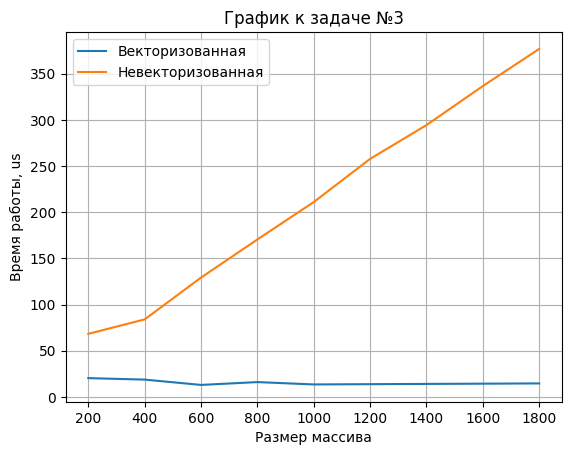

In [ ]:
def max_after_zero(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Not vectorized implementation.
    """
    m = min(x)
    for i in range(len(x) - 1):
        if x[i] == 0 and x[i + 1] != 0 and x[i + 1] > m:
            m = x[i + 1]
    return m

def max_after_zero_v(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Vectorized implementation.
    """
    ind = np.hstack((np.ones((1)), x)) == 0
    return np.max(x[ind[:-1]])

a = [6, 2, 0, 3, 0, 0, 5, 7, 0]
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_after_zero(a))
print(max_after_zero_v(x))

data_size_3 = [x for x in range(200, 2000, 200)]
v_list_3 = []
non_v_list_3 = []
for size in data_size_3:
    X = np.random.randint(-10, 10, (size))
    v_time = %timeit -o max_after_zero_v(X)
    non_v_time = %timeit -o max_after_zero(X)
    v_list_3.append(v_time.average * 1000000)
    non_v_list_3.append(non_v_time.average * 1000000)

plt.plot(data_size_3, v_list_3, label=u"Векторизованная")
plt.plot(data_size_3, non_v_list_3, label=u"Невекторизованная")
plt.xticks(data_size_3)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №3')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


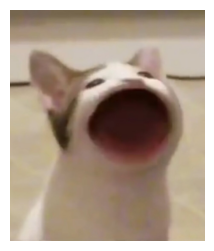

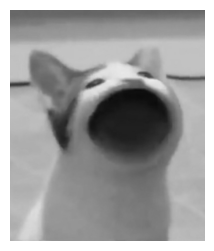

23.9 µs ± 522 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.12 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
40.5 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.57 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
83.5 µs ± 3.71 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.39 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
145 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
14.9 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
217 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
23 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
313 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
32.7 ms ± 391 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
420 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
46.1 ms ± 943 µs per loop (mean ± std. dev. of 7 runs, 10 

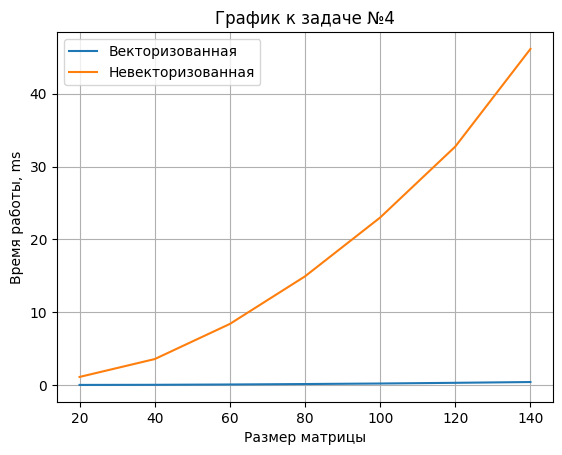

In [ ]:
def convert_image(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Not vectorized implementation.
    """
    h = len(img)
    w = len(img[0])
    res = []
    for i in range(h):
        str = []
        for j in range(w):
            sum = 0
            for k in range(len(coefs)):
                sum += img[i][j][k] * coefs[k]
            str.append(sum)
        res.append(str)
    return res

def convert_image_v(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Vectorized implementation.
    """
    return np.sum(img * coefs, axis=-1)

from PIL import Image
from matplotlib.pyplot import *
img = Image.open("./cat2.jpeg")
img = np.array(img)
pilimg = Image.fromarray(img)
figure(figsize=(3, 3))
imshow(pilimg)
axis('off')
show()

coefs = np.array([0.299, 0.587, 0.114])
img = convert_image_v(img, coefs)
pilimg = Image.fromarray(np.array(img))
figure(figsize=(3, 3))
imshow(pilimg)
axis('off')
show()

data_size_4 = [x for x in range(20, 150, 20)]    
v_list_4 = []
non_v_list_4 = []
for size in data_size_4:
    img = np.random.randint(-10, 10, (size, size, 3))
    coefs = np.random.random(3)
    v_time = %timeit -o convert_image_v(img, coefs)
    non_v_time = %timeit -o convert_image(img, coefs)
    v_list_4.append(v_time.average * 1000)
    non_v_list_4.append(non_v_time.average * 1000)

plt.plot(data_size_4, v_list_4, label=u"Векторизованная")
plt.plot(data_size_4, non_v_list_4, label=u"Невекторизованная")
plt.xticks(data_size_4)
plt.xlabel(u'Размер матрицы')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №4')
plt.grid(True)
plt.legend()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

([2, 3, 5], [3, 3, 1])
(array([2, 3, 5]), array([3, 3, 1]))
23.4 µs ± 843 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.73 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.9 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
159 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.8 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
318 µs ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
16.9 µs ± 170 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
485 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
17.2 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
661 µs ± 9.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
18.2 µs ± 334 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
826 µs ± 4.34 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
18.5 µs ± 168 ns per loop (mean ± std. dev. of 7 r

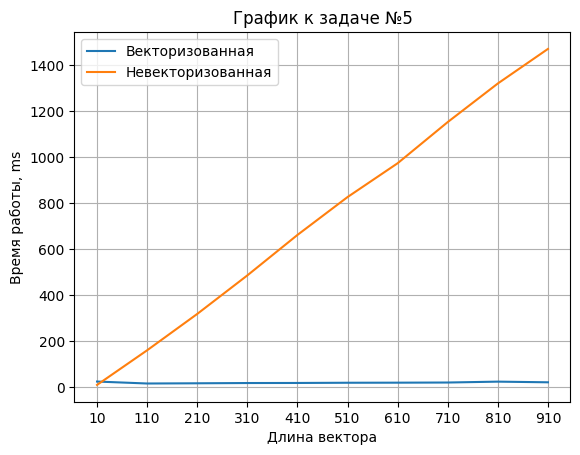

In [ ]:
def run_length_encoding(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Not vectorized implementation.
    """
    dig = []
    count = []
    for i in range(len(x)):
        if not(x[i] in dig):
            dig.append(x[i])
            count.append(1)
        else:
            for j in range(len(dig)):
                if x[i] == dig[j]:
                    count[j] += 1
    return (dig, count)

def run_length_encoding_v(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Vectorized implementation.
    """
    y = np.hstack((np.ones(1), x[:- 1]))
    first_pos = x != y
    first_pos[0] = True
    ind1 = np.arange(np.size(x))[first_pos]
    ind2 = np.hstack((ind1[1:], np.array([np.size(x)])))
    return x[first_pos], ind2 - ind1

a = [2, 2, 2, 3, 3, 3, 5]
x = np.array([2, 2, 2, 3, 3, 3, 5])
print(run_length_encoding(a))
print(run_length_encoding_v(x))

data_size_5 = [x for x in range(10, 1000, 100)]    
v_list_5 = []
non_v_list_5 = []
for size in data_size_5:
    x = np.random.randint(-5, 5, (size))
    v_time = %timeit -o run_length_encoding_v(x)
    non_v_time = %timeit -o run_length_encoding(x)
    v_list_5.append(v_time.average * 1000000)
    non_v_list_5.append(non_v_time.average * 1000000)

plt.plot(data_size_5, v_list_5, label=u"Векторизованная")
plt.plot(data_size_5, non_v_list_5, label=u"Невекторизованная")
plt.xticks(data_size_5)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №5')
plt.grid(True)
plt.legend()
plt.show()

* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

12.5 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
788 µs ± 4.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.94 µs ± 54.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
68.3 µs ± 410 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.2 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
247 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
74.8 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.2 µs ± 640 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.15 ms ± 7.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
200 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
113 µs ± 349 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.56 ms ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
420 ms ± 4.45 ms per loop (mean ± std. dev. of 7 run

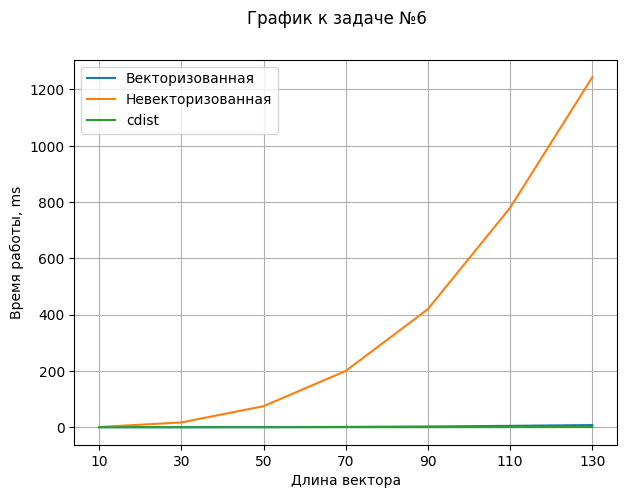

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def pairwise_distance(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Not vectorized implementation.
    """
    res = []
    for i in range(len(x)):
        curr_lst = []
        for j in range(len(y)):
            dst = 0
            for k in range(len(x[0])):
                dst += (x[i][k] - y[j][k]) ** 2
            curr_lst.append((dst) ** 0.5)
        res.append(curr_lst)
    return res

def pairwise_distance_v(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Vctorized implementation.
    """
    return np.sqrt(np.sum((x[:, np.newaxis] - y) ** 2, axis=-1))

from scipy.spatial.distance import cdist
data_size_6 = [x for x in range(10, 150, 20)]  
v_lst_6 = []
non_v_lst_6 = []
cdist_lst = []
for size in data_size_6:
    x = np.random.randint(-5, 5, (size, size))
    y = np.random.randint(-5, 5, (size, size))
    v_time = %timeit -o pairwise_distance_v(x, y)
    non_v_time = %timeit -o pairwise_distance(x, y)
    cdist_time = %timeit -o cdist(x, y, metric='euclidean')
    v_lst_6.append(v_time.average * 1000)
    non_v_lst_6.append(non_v_time.average * 1000)
    cdist_lst.append(cdist_time.average * 1000)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('График к задаче №6')
ax.plot(data_size_6, v_lst_6, label=u"Векторизованная")
ax.plot(data_size_6, non_v_lst_6, label=u"Невекторизованная")
ax.plot(data_size_6, cdist_lst, label='cdist')
ax.set_xticks(data_size_6)
ax.set_xlabel(u'Длина вектора')
ax.set_ylabel(u'Время работы, ms')
ax.grid(True)
ax.legend()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

## Во время выполнения этой работы я узнала:

__как работать с массивами__

***как использовать numpy***

~~как строить графики~~

*как использовать markdown*